In [34]:
import pandas as pd
import numpy as np
#sklearn.preprocessing 의 scale:스케일 조정 패키지
from sklearn.preprocessing import scale
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [35]:
df_custom = pd.read_csv("../data/callcustom.csv",encoding = 'euc-kr')
df_custom.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [36]:
df_custom.CHURN = df_custom.CHURN.map(lambda x:1 if x =="Active" else 0)
df_custom

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
5,1,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
7,1,K106350,M,36,CAT 100,ASAD170,Med,54.87,2,522,801.6,0,0.0,558,884.7
8,1,K106570,F,43,CAT 100,S50,Med,11.23,0,156,516.6,8,84.0,362,987.6
9,1,K107570,F,50,CAT 100,ASAD170,Med,49.97,0,136,466.2,13,31.8,186,632.7


In [37]:
df_custom.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [38]:
df_custom.drop("CUSTOMER_ID",axis=1,inplace = True)
df_custom.columns

Index(['CHURN', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND',
       'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME',
       'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO',
       'TOTAL_CALLS_TIME'],
      dtype='object')

In [39]:
df_custom_y = df_custom["CHURN"]
df_custom_x = pd.get_dummies(df_custom)
df_custom_x.drop("CHURN",axis= 1,inplace = True)

In [40]:
x= df_custom_x
y= df_custom_y
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (651, 33)
train data y size : (651,)
test data x size : (279, 33)
test data y size : (279,)


In [41]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(x_tr,y_tr)

print("accuracy on train set: {:.3f}".format(svm_uncustomized.score(x_tr,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized.score(x_test,y_test)))


accuracy on train set: 1.000
accuracy on test set: 0.842


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
train_accuracy = []
test_accuracy = []
para_C = []

for C in range(10):
    svm1 = SVC(C= (C+1)/10, random_state = 1234)
    svm1.fit(x_tr,y_tr)
    para_C.append((C+1)/10)
    train_accuracy.append(svm1.score(x_tr,y_tr))
    test_accuracy.append(svm1.score(x_test,y_test))

df_accuracy1 = pd.DataFrame()
df_accuracy1["C"] = para_C
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,TestAccuracy
0,0.1,0.791,0.842
1,0.2,0.791,0.842
2,0.3,0.791,0.842
3,0.4,0.791,0.842
4,0.5,0.791,0.842
5,0.6,0.791,0.842
6,0.7,0.791,0.842
7,0.8,1.000,0.842
8,0.9,1.000,0.842
9,1.0,1.000,0.842


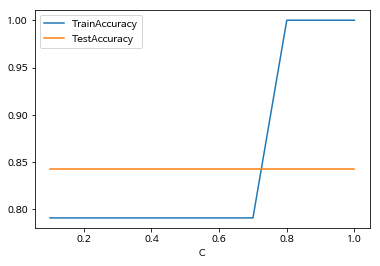

In [46]:
df_accuracy1.set_index("C",inplace = False).plot.line()

In [47]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2 = SVC(gamma = gamma/10, random_state = 1234)
    svm2.fit(x_tr,y_tr)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(x_tr,y_tr))
    test_accuracy.append(svm2.score(x_test,y_test))

df_accuracy2 = pd.DataFrame()
df_accuracy2["Gamma"] = para_gamma
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.842294
1,0.2,1.0,0.842294
2,0.3,1.0,0.842294
3,0.4,1.0,0.842294
4,0.5,1.0,0.842294
5,0.6,1.0,0.842294
6,0.7,1.0,0.842294
7,0.8,1.0,0.842294
8,0.9,1.0,0.842294


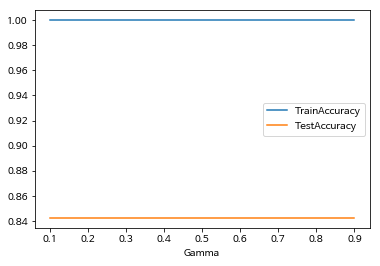

In [48]:
df_accuracy2.set_index("Gamma",inplace = False).plot.line()

In [49]:
# 스케일 적용
x_tr_scaled = scale(x_tr,axis = 0)
x_test_scaled = scale(x_test,axis = 0)

pd.DataFrame(x_tr_scaled,columns = x_tr.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


In [50]:
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(x_tr_scaled,y_tr)

print("accuracy on train set: {:.3f}".format(svm_uncustomized_scaled.score(x_tr_scaled,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(x_test_scaled,y_test)))
# 스케일 된 데이터로 할 경우 정확도가 더 높아짐을 알수있다.

accuracy on train set: 0.916
accuracy on test set: 0.896


In [51]:
train_accuracy = []
test_accuracy = []
para_C = []

for C in range(15):
    svm1_2 = SVC(C= (C+1), random_state = 1234)
    svm1_2.fit(x_tr_scaled,y_tr)
    para_C.append(C+1)
    train_accuracy.append(svm1_2.score(x_tr_scaled,y_tr))
    test_accuracy.append(svm1_2.score(x_test_scaled,y_test))

df_accuracy1_scaled = pd.DataFrame()
df_accuracy1_scaled["C"] = para_C
df_accuracy1_scaled["TrainAccuracy"] = train_accuracy
df_accuracy1_scaled["TestAccuracy"] = test_accuracy
df_accuracy1_scaled

,C,TrainAccuracy,TestAccuracy
0,1,0.915515,0.896057
1,2,0.935484,0.896057
2,3,0.947773,0.892473
3,4,0.953917,0.892473
4,5,0.958525,0.888889
5,6,0.961598,0.892473
6,7,0.967742,0.892473
7,8,0.967742,0.888889
8,9,0.972350,0.888889
9,10,0.975422,0.892473


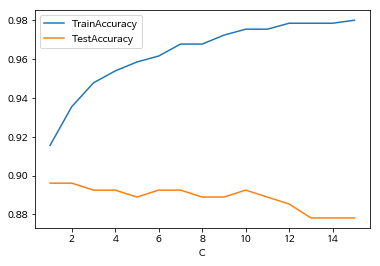

In [52]:
df_accuracy1_scaled.set_index("C",inplace = False).plot.line()

In [53]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2_2 = SVC(gamma = gamma/10, random_state = 1234)
    svm2_2.fit(x_tr_scaled,y_tr)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2_2.score(x_tr_scaled,y_tr))
    test_accuracy.append(svm2_2.score(x_test_scaled,y_test)) 

df_accuracy2_scaled = pd.DataFrame()
df_accuracy2_scaled["Gamma"] = para_gamma
df_accuracy2_scaled["TrainAccuracy"] = train_accuracy
df_accuracy2_scaled["TestAccuracy"] = test_accuracy
df_accuracy2_scaled.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.959,0.885
1,0.2,0.978,0.857
2,0.3,0.980,0.842
3,0.4,0.986,0.846
4,0.5,0.991,0.846
5,0.6,0.995,0.846
6,0.7,0.997,0.846
7,0.8,0.997,0.842
8,0.9,0.997,0.842


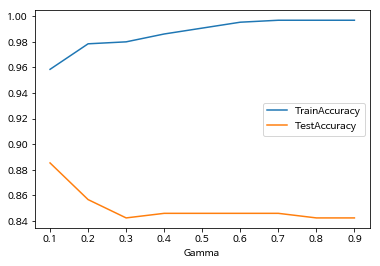

In [54]:
df_accuracy2_scaled.set_index("Gamma",inplace = False).plot.line()

In [55]:

svm3 = SVC(C = 10 , gamma = 0.4, random_state = 1234)
svm3.fit(x_tr_scaled,y_tr)

train_accuracy =svm3.score(x_tr_scaled,y_tr)
test_accuracy = svm3.score(x_test_scaled,y_test)

print("train accuracy = {:.3f}".format(train_accuracy))
print("test accuracy = {:.3f}".format(test_accuracy))


train accuracy = 1.000
test accuracy = 0.839
